# Impact of the resolution on DLinkNet Predictions #
This notebook git clone the official Dlinknet repository

This notebook requires python 2.

## Download the Dlinknet source code ##

When using Google Colab, make sure that you have uploaded the satellite images (tif extension) as well as the file ```test.py```.

In [1]:
!git clone https://github.com/zlkanata/DeepGlobe-Road-Extraction-Challenge.git

Cloning into 'DeepGlobe-Road-Extraction-Challenge'...
remote: Enumerating objects: 35, done.
remote: Total 35 (delta 0), reused 0 (delta 0), pack-reused 35
Unpacking objects: 100% (35/35), done.


Copy a modified version of the test script

In [0]:
%%bash
cp test.py DeepGlobe-Road-Extraction-Challenge

# DeepGlobe #
Move images where they need to be (need ```.tif``` extension).

In [0]:
%%bash
mkdir -p /content/data/test/input
mv *.tif /content/data/test/input

Download the dlinknet weights and put them in the right place

In [4]:
%%bash
wget https://www.dropbox.com/sh/h62vr320eiy57tt/AADGdaxekkNFFsiMF98dNkS1a/log01_dink34.th
mv log01_dink34.th DeepGlobe-Road-Extraction-Challenge/weights

--2020-04-01 20:13:47--  https://www.dropbox.com/sh/h62vr320eiy57tt/AADGdaxekkNFFsiMF98dNkS1a/log01_dink34.th
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.1, 2620:100:6021:1::a27d:4101
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /sh/raw/h62vr320eiy57tt/AADGdaxekkNFFsiMF98dNkS1a/log01_dink34.th [following]
--2020-04-01 20:13:47--  https://www.dropbox.com/sh/raw/h62vr320eiy57tt/AADGdaxekkNFFsiMF98dNkS1a/log01_dink34.th
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc49be882066ce8bd7a75608076b.dl.dropboxusercontent.com/cd/0/inline/A1ApMcAIIqVTKbYYeEIhU_f0ld2maGrEu6tT9fpfJHgK2kYt9QLQbvy7xIig5aPBYMZ44f7GjYy8v2qL0IBXCMVrURfPUVX3CP-vNOE_IUG5Fg/file# [following]
--2020-04-01 20:13:47--  https://uc49be882066ce8bd7a75608076b.dl.dropboxusercontent.com/cd/0/inline/A1ApMcAIIqVTKbYYeEIhU_f0ld2maGrEu6tT9fpfJH

## Change resolution ##
Changes the resolution of the images

In [0]:
from scipy.signal import convolve2d
import glob
import numpy as np
import matplotlib.pyplot as plt

In [0]:
path = "/content/data/test/input/"

In [0]:
def change_res(img, k):
    """
    Divide the resolution of img by a factor k.
    """
    kernel = np.ones((k,k))/(k*k)
    res = np.zeros_like(img)
    for i in range(3):
        res[:,:,i] = convolve2d(img[:,:,i], kernel,mode='same')
    return res[::k,::k]

In [0]:
def resize_folder(path, ks = [2], ext ="tif"):
    """
    Resize all images in path with the given extension ext by all the factors in ks.
    """
    for f in glob.glob(path + "*." + ext):
        print(f)
        for k in ks:
            img = plt.imread(f)
            resized = change_res(img, k)
            outf = f[:-(len(ext)+1)] + "_r{}.".format(k) + ext
            plt.imsave(outf, resized)

In [20]:
resize_folder(path, [1,2,3,4],"tif")

/content/data/test/input/img1.tif
/content/data/test/input/img2.tif


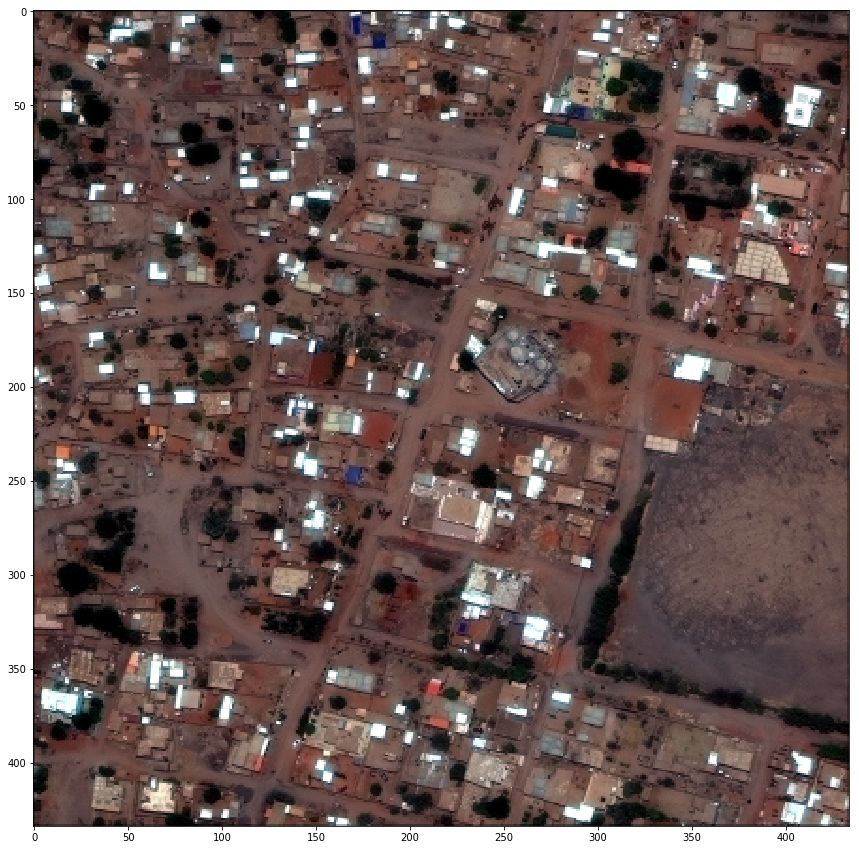

In [21]:
a = plt.imread("data/test/input/img1.tif")
plt.figure(figsize=(15,15))
plt.imshow(change_res(a,3))
plt.show()

## Road extraction ##

In [22]:
%%bash
cd DeepGlobe-Road-Extraction-Challenge
rm -r submits/dlinknet
python test.py


0      0.00


rm: cannot remove 'submits/dlinknet': No such file or directory
Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|##########| 83.3M/83.3M [00:05<00:00, 16.2MB/s]
/usr/local/lib/python2.7/dist-packages/torch/nn/functional.py:1351: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


In [0]:
%%bash
mkdir results
mv /content/DeepGlobe-Road-Extraction-Challenge/submits/dlinknet/img*_r*mask.png results

In [0]:
%%bash
cp data/test/input/img*.tif results

## Visualizing the results ##

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import glob

In [0]:
def vis(img, roads, k=1):
    img = img.copy()
    for x,y in np.ndindex(k,k):
        if k == 3:
            img[x:x+k*256:k,y:y+k*256:k,:][roads] += [0.5,0,0]
        else:
            img[x::k,y::k,:][roads] += [0.5,0,0]
    if k ==3:
        img = img[:2+k*256,:2+k*256]
    return img.clip(0,1)

def showres(name):
    a = plt.imread(name + "1.tif")[:1024,:1024,:3].astype(float)/255
    for s in [1,2,3,4]:
        print('{}cm'.format(30*s))
        b = plt.imread(name + "{}mask.png".format(s))[:,:,0] == 1
        c = vis(a,b, s)
        plt.figure(figsize=(10,10))
        plt.imshow(c)
        plt.show()
        plt.imsave(name + "{}sup.png".format(s), c)

30cm


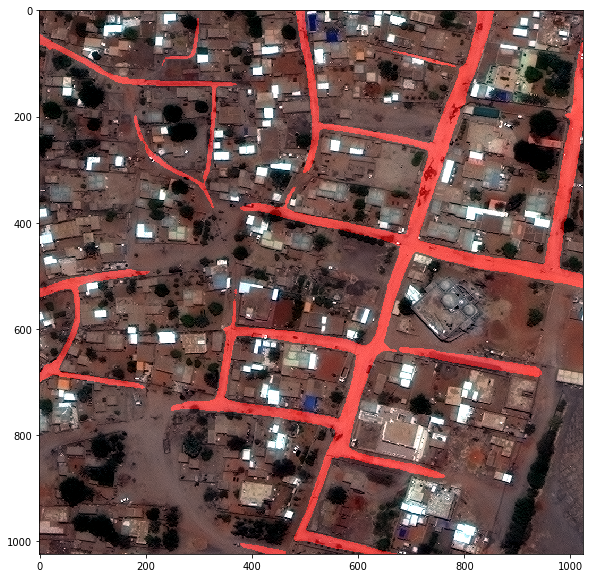

60cm


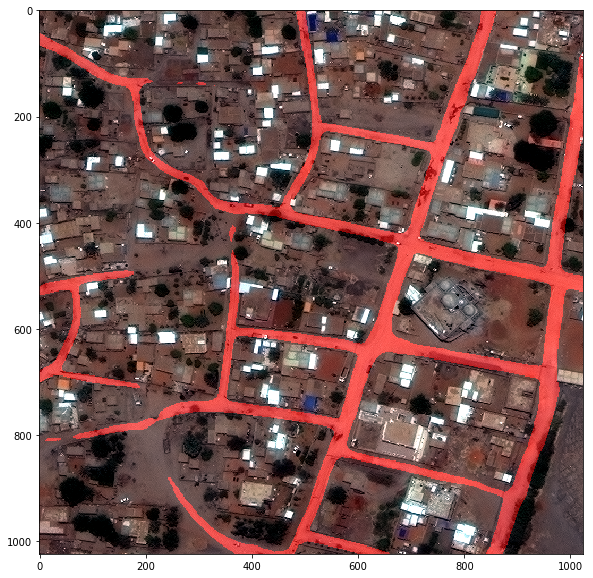

90cm


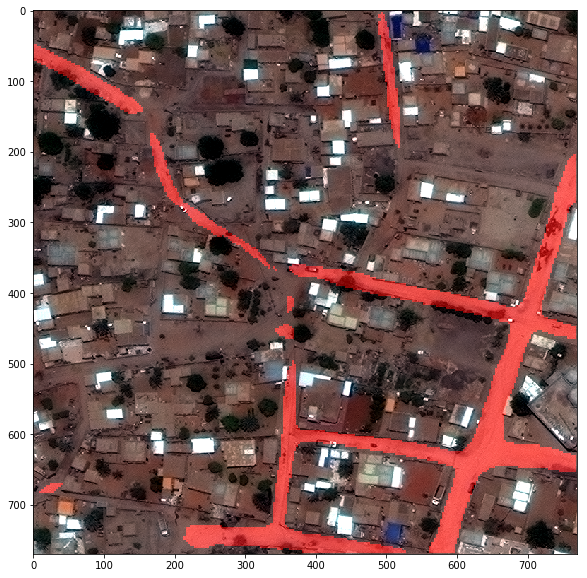

120cm


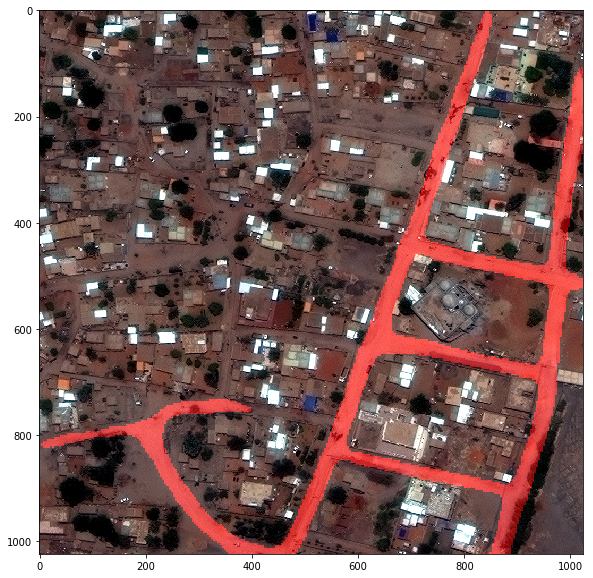

In [27]:
name = "results/img1_r"
showres(name)

30cm


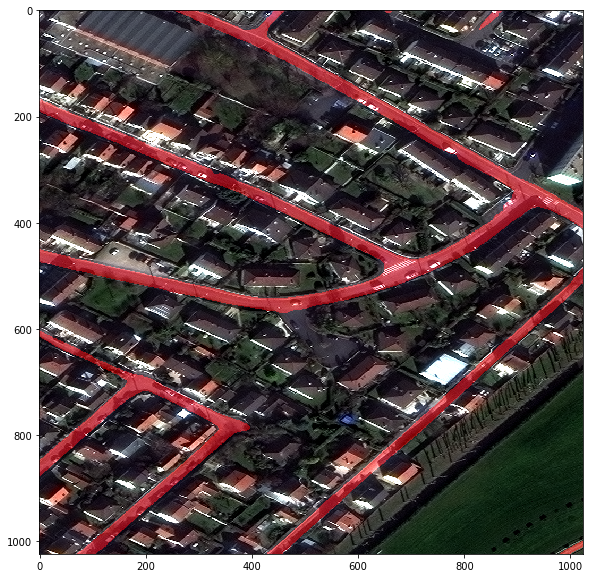

60cm


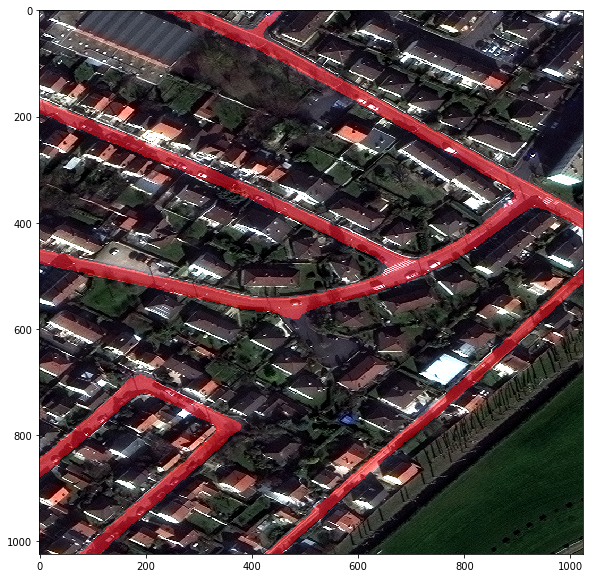

90cm


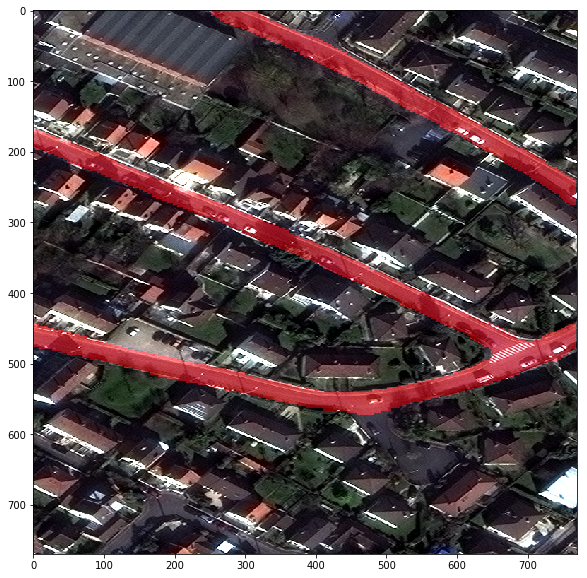

120cm


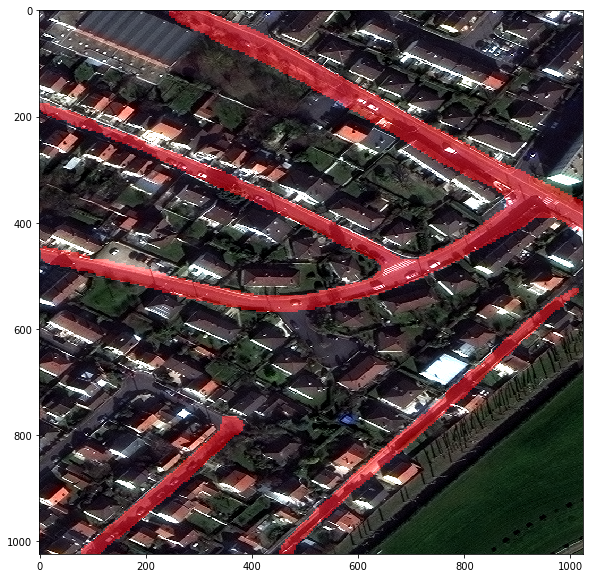

In [28]:
name = "results/img2_r"
showres(name)